In [6]:
import numpy as np
import pandas as pd
import sklearn.ensemble

import toolsets.data_prep as data_prep
from sklearn.ensemble import RandomForestClassifier
import cleanlab
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_validate
from cleanlab.filter import find_label_issues
%load_ext autoreload
%autoreload 2

i am updated!
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# initialize the dataset

In [7]:

# descriptors_objects = descriptors.select_dtypes(include=['object'])


In [96]:
descriptors = pd.read_csv("data/multiRT/MultiRT_hilic_descriptors.csv", low_memory=False)
combined_data = pd.read_csv("data/multiRT/Combined dataset.csv")
hilic = combined_data.loc[combined_data['Column']=='HILIC']
hilic.reset_index(inplace=True, drop=True)
data = pd.concat([hilic, descriptors],axis =1)
data = data_prep.dataset_prep(data)

# only working method

# Now it works

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

clf = RandomForestClassifier()
# clf = lgb.LGBMClassifier()

#Create a svm Classifier
# clf = svm.SVC(kernel='rbf') # rbf Kernel

In [113]:
train, test = data_prep.make_train_test(data)

In [115]:
train.reset_index(inplace=True, drop=True)

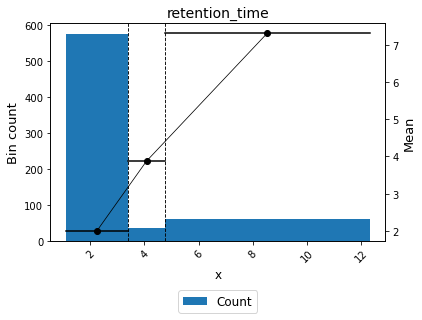

the distinct rt intervals are ['(-inf, 3.40)' '[3.40, 4.75)' '[4.75, inf)']


In [116]:
train_bin = data_prep.bin_retention_time(train,'retention_time',variable = 'retention_time', bin_method = "cart", min_diff=1)

In [118]:
train_bin_confirmed, train_bin_suspicious = data_prep.mislabeled_handling(train_bin, clf, debug=False)

i am updated!


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


i have passed cv!
Cleanlab found 36 potential label errors.


In [120]:
train_confirmed = train_bin_confirmed.drop(['retention_time_cat'], axis = 1)

# fitting models autogluon

In [122]:
train_confirmed.shape


(634, 1618)

In [123]:
train.shape

(670, 1618)

In [124]:
autort.autogluon_fit_train_test(train, test, "models/hilic_raw_v2")

Beginning AutoGluon training ...
AutoGluon will save models to "models/hilic_raw_v2/"
AutoGluon Version:  0.4.1b20220404
Python Version:     3.9.10
Operating System:   Darwin
Train Data Rows:    670
Train Data Columns: 1617
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (12.321428571428571, 1.0871428571428572, 2.57276, 1.66904)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4277.64 MB
	Train Data (Original)  Memory Usage: 26.35 MB (0.6% of available memory)
	Inferring data type of each feature based on column values. Set fea

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -1.023687       0.401806  13.029887                0.000157           0.085053            2       True         11
1               XGBoost  -1.025872       0.015916   8.343169                0.015916           8.343169            1       True          8
2       RandomForestMSE  -1.071162       0.032304   5.134906                0.032304           5.134906            1       True          5
3         ExtraTreesMSE  -1.081974       0.034382   2.000957                0.034382           2.000957            1       True          6
4            LightGBMXT  -1.091030       0.023550   7.314035                0.023550           7.314035            1       True          3
5         LightGBMLarge  -1.101102       0.024443  23.402122                0.024443          23.402122 

Evaluation: root_mean_squared_error on test data: -0.5532323926019367
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5532323926019367,
    "mean_squared_error": -0.30606608022406345,
    "mean_absolute_error": -0.31838386508259914,
    "r2": 0.8678812380737897,
    "pearsonr": 0.9323280194280247,
    "median_absolute_error": -0.09822120587031047
}


{'root_mean_squared_error': -0.5532323926019367, 'mean_squared_error': -0.30606608022406345, 'mean_absolute_error': -0.31838386508259914, 'r2': 0.8678812380737897, 'pearsonr': 0.9323280194280247, 'median_absolute_error': -0.09822120587031047}


In [125]:
autort.autogluon_fit_train_test(train_confirmed, test, "models/hilic_confirmed_v2")

Beginning AutoGluon training ...
AutoGluon will save models to "models/hilic_confirmed_v2/"
AutoGluon Version:  0.4.1b20220404
Python Version:     3.9.10
Operating System:   Darwin
Train Data Rows:    634
Train Data Columns: 1617
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.588571428571427, 1.0871428571428572, 2.45848, 1.57318)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5319.47 MB
	Train Data (Original)  Memory Usage: 24.98 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. S

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.276429       0.092369  22.507266                0.000147           0.084372            2       True         11
1               XGBoost  -0.280124       0.016579   8.282152                0.016579           8.282152            1       True          8
2       RandomForestMSE  -0.329433       0.030963   5.381981                0.030963           5.381981            1       True          5
3         ExtraTreesMSE  -0.375009       0.030798   1.849878                0.030798           1.849878            1       True          6
4            LightGBMXT  -0.387437       0.022639   8.638408                0.022639           8.638408            1       True          3
5              LightGBM  -0.450441       0.023968   7.380892                0.023968           7.380892 

Evaluation: root_mean_squared_error on test data: -0.6697979123273312
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.6697979123273312,
    "mean_squared_error": -0.44862924335805127,
    "mean_absolute_error": -0.33738261958448895,
    "r2": 0.8063413621236093,
    "pearsonr": 0.90676842213037,
    "median_absolute_error": -0.0611706359045846
}


{'root_mean_squared_error': -0.6697979123273312, 'mean_squared_error': -0.44862924335805127, 'mean_absolute_error': -0.33738261958448895, 'r2': 0.8063413621236093, 'pearsonr': 0.90676842213037, 'median_absolute_error': -0.0611706359045846}


In [387]:
import lightgbm as lgb

In [33]:
train_bin

,Column,Organic_modifier,pH,Buffer,retention_time,retention_time_cat,ABC,ABCGG,nAcid,nBase,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,HILIC,Acetonitrile,2.7,Formic acid,1.822857,0,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
1,HILIC,Acetonitrile,3.0,Acetic acid,12.321429,3,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,HILIC,Acetonitrile,5.0,Acetic acid,1.850000,0,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,HILIC,Acetonitrile,5.0,Formic acid,1.851429,0,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
5,HILIC,Acetonitrile,6.7,Formic acid,1.930000,0,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,HILIC,Acetonitrile,3.0,Formic acid,1.910000,NaN,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,HILIC,Methanol,2.7,Formic acid,1.808571,NaN,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,HILIC,Methanol,3.0,Formic acid,1.790000,NaN,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
834,HILIC,Methanol,5.0,Acetic acid,1.433333,NaN,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [61]:
data = data.drop(['split_index'], axis = 1)

In [46]:
data

,Organic_modifier,pH,Buffer,retention_time,retention_time_cat,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Acetonitrile,2.7,Formic acid,1.822857,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
1,Acetonitrile,3.0,Acetic acid,12.321429,4,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,Acetonitrile,3.0,Formic acid,1.857143,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,Acetonitrile,5.0,Acetic acid,1.850000,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,Acetonitrile,5.0,Formic acid,1.851429,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Acetonitrile,5.0,Formic acid,3.177143,2,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,Methanol,2.7,Formic acid,1.808571,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Methanol,3.0,Formic acid,1.790000,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
834,Methanol,5.0,Acetic acid,1.433333,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [47]:
data

,Organic_modifier,pH,Buffer,retention_time,retention_time_cat,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Acetonitrile,2.7,Formic acid,1.822857,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
1,Acetonitrile,3.0,Acetic acid,12.321429,4,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,Acetonitrile,3.0,Formic acid,1.857143,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,Acetonitrile,5.0,Acetic acid,1.850000,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,Acetonitrile,5.0,Formic acid,1.851429,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Acetonitrile,5.0,Formic acid,3.177143,2,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,Methanol,2.7,Formic acid,1.808571,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Methanol,3.0,Formic acid,1.790000,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
834,Methanol,5.0,Acetic acid,1.433333,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [48]:
train_bin=train_bin.drop(['Column'], axis = 1)

In [50]:
data.shape, train_bin.shape

i am updated!


((836, 1618), (679, 1618))

In [66]:
data = data.drop(['split_index'], axis =1 )

In [67]:
train, test = data_prep.make_train_test(data)

In [69]:
train

,Organic_modifier,pH,Buffer,retention_time,retention_time_cat,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Acetonitrile,2.7,Formic acid,1.822857,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
1,Acetonitrile,3.0,Acetic acid,12.321429,4,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,Acetonitrile,5.0,Acetic acid,1.850000,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,Acetonitrile,5.0,Formic acid,1.851429,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
5,Acetonitrile,6.7,Formic acid,1.930000,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Acetonitrile,5.0,Formic acid,3.177143,2,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,Methanol,2.7,Formic acid,1.808571,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Methanol,3.0,Formic acid,1.790000,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
834,Methanol,5.0,Acetic acid,1.433333,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [70]:
train_confirmed, train_suspicious = data_prep.mislabeled_handling(train, clf)

retention_time_cat


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

Cleanlab found 62 potential label errors.


In [73]:
import toolsets.auto_rt_pred as autort

Hi I am compiled version of the rt prediction using autogluon and mordred descriptor calculator
the usage is make_descriptors(data) and auto_rt_pred_with_descriptor(data, savepath)
the data is a dataframe with columns smiles, retention_time, and split_index (1 for training, 2 for test)
this function will returns a model


In [77]:
train_confirmed = train_confirmed.drop(['retention_time_cat'], axis = 1)

In [78]:
train = train.drop(['retention_time_cat'], axis = 1)

In [79]:
autort.autogluon_fit_train_test(train_confirmed, test, "data/models/hilic_confimed_v2")

Beginning AutoGluon training ...
AutoGluon will save models to "data/models/hilic_confimed_v2/"
AutoGluon Version:  0.4.1b20220404
Python Version:     3.9.10
Operating System:   Darwin
Train Data Rows:    619
Train Data Columns: 1616
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.588571428571427, 1.34, 2.53306, 1.59894)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4509.84 MB
	Train Data (Original)  Memory Usage: 24.31 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Set feature

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.453890       0.068708  31.252135                0.000143           0.083526            2       True         11
1               XGBoost  -0.493078       0.017162   8.292731                0.017162           8.292731            1       True          8
2         ExtraTreesMSE  -0.517693       0.027745   1.839584                0.027745           1.839584            1       True          6
3       RandomForestMSE  -0.518254       0.031573   4.963771                0.031573           4.963771            1       True          5
4            LightGBMXT  -0.563516       0.023822   5.252174                0.023822           5.252174            1       True          3
5         LightGBMLarge  -0.595988       0.023658  21.036294                0.023658          21.036294 

In [80]:
autort.autogluon_fit_train_test(train, test, "data/models/hilic_raw_v2")

Beginning AutoGluon training ...
AutoGluon will save models to "data/models/hilic_raw_v2/"
AutoGluon Version:  0.4.1b20220404
Python Version:     3.9.10
Operating System:   Darwin
Train Data Rows:    670
Train Data Columns: 1616
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (12.321428571428571, 1.0871428571428572, 2.57276, 1.66904)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5463.85 MB
	Train Data (Original)  Memory Usage: 26.31 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Se

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -1.023687       0.257537  12.974327                0.000157           0.086452            2       True         11
1               XGBoost  -1.025872       0.016250   8.167121                0.016250           8.167121            1       True          8
2       RandomForestMSE  -1.071162       0.038189   5.335251                0.038189           5.335251            1       True          5
3         ExtraTreesMSE  -1.081974       0.033675   1.945782                0.033675           1.945782            1       True          6
4            LightGBMXT  -1.091030       0.023046   8.077332                0.023046           8.077332            1       True          3
5         LightGBMLarge  -1.101102       0.021787  24.830668                0.021787          24.830668 

Evaluation: root_mean_squared_error on test data: -0.5532323926019367
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5532323926019367,
    "mean_squared_error": -0.30606608022406345,
    "mean_absolute_error": -0.31838386508259914,
    "r2": 0.8678812380737897,
    "pearsonr": 0.9323280194280247,
    "median_absolute_error": -0.09822120587031047
}


{'root_mean_squared_error': -0.5532323926019367, 'mean_squared_error': -0.30606608022406345, 'mean_absolute_error': -0.31838386508259914, 'r2': 0.8678812380737897, 'pearsonr': 0.9323280194280247, 'median_absolute_error': -0.09822120587031047}


In [55]:
data_confirmed

,Organic_modifier,pH,Buffer,retention_time,retention_time_cat,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Acetonitrile,2.7,Formic acid,1.822857,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,Acetonitrile,3.0,Formic acid,1.857143,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,Acetonitrile,5.0,Formic acid,1.851429,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
5,Acetonitrile,6.7,Formic acid,1.930000,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
6,Methanol,2.7,Formic acid,1.794286,0,14.008885,10.537147,0,0,23.372976,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,Acetonitrile,5.0,Acetic acid,2.718333,2,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
831,Acetonitrile,5.0,Formic acid,3.177143,2,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,Methanol,2.7,Formic acid,1.808571,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Methanol,3.0,Formic acid,1.790000,0,24.305499,20.006308,3,0,40.628986,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [41]:
data

,Column,Organic_modifier,pH,Buffer,retention_time,retention_time_cat,ABC,ABCGG,nAcid,nBase,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,split_index
0,HILIC,Acetonitrile,2.7,Formic acid,1.822857,0,14.008885,10.537147,0,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
1,HILIC,Acetonitrile,3.0,Acetic acid,12.321429,4,14.008885,10.537147,0,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
2,HILIC,Acetonitrile,3.0,Formic acid,1.857143,0,14.008885,10.537147,0,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,2
3,HILIC,Acetonitrile,5.0,Acetic acid,1.850000,0,14.008885,10.537147,0,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
4,HILIC,Acetonitrile,5.0,Formic acid,1.851429,0,14.008885,10.537147,0,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1


In [49]:
train_confirmed, train_suspicious = data_prep.mislabeled_handling(train_bin, clf)

retention_time_cat


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [20]:
data_suspicious

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,retention_time_cat,ABC,ABCGG,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,12.321429,4,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
12,1-Nitropyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)N(=O)=O,2.373333,1,15.492048,11.735103,...,10.272116,53.528456,247.063329,8.823690,596,37,110.0,137.0,5.138889,4.027778
13,1-Nitropyrene,HILIC,Acetonitrile,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)N(=O)=O,2.338000,1,15.492048,11.735103,...,10.272116,53.528456,247.063329,8.823690,596,37,110.0,137.0,5.138889,4.027778
14,1-Nitropyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)N(=O)=O,2.226667,0,15.492048,11.735103,...,10.272116,53.528456,247.063329,8.823690,596,37,110.0,137.0,5.138889,4.027778
44,2-naphthoic acid,HILIC,Acetonitrile,6.7,Formic acid,c1ccc2cc(ccc2c1)C(=O)O,2.295714,1,10.037394,8.562783,...,9.407468,44.347861,172.052429,8.192973,238,18,66.0,76.0,4.194444,2.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,Sulfamethazine,HILIC,Acetonitrile,5.0,Formic acid,Cc1cc(C)nc(n1)NS(=O)(=O)c1ccc(cc1)N,2.480000,1,14.726533,12.491650,...,9.824498,52.353339,278.083747,8.426780,722,27,98.0,111.0,7.618056,4.041667
737,Sulfamethazine,HILIC,Acetonitrile,6.7,Formic acid,Cc1cc(C)nc(n1)NS(=O)(=O)c1ccc(cc1)N,1.990000,0,14.726533,12.491650,...,9.824498,52.353339,278.083747,8.426780,722,27,98.0,111.0,7.618056,4.041667
738,Sulfamethazine,HILIC,Methanol,2.7,Formic acid,Cc1cc(C)nc(n1)NS(=O)(=O)c1ccc(cc1)N,1.877143,0,14.726533,12.491650,...,9.824498,52.353339,278.083747,8.426780,722,27,98.0,111.0,7.618056,4.041667
740,Sulfamethazine,HILIC,Methanol,3.0,Formic acid,Cc1cc(C)nc(n1)NS(=O)(=O)c1ccc(cc1)N,2.295714,1,14.726533,12.491650,...,9.824498,52.353339,278.083747,8.426780,722,27,98.0,111.0,7.618056,4.041667


In [23]:
data_confirmed.loc[data_confirmed['Compound_name']=='1-hydroxypyrene']

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,retention_time_cat,ABC,ABCGG,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.822857,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.857143,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.850000,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.851429,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
5,1-hydroxypyrene,HILIC,Acetonitrile,6.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.930000,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
6,1-hydroxypyrene,HILIC,Methanol,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.794286,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
7,1-hydroxypyrene,HILIC,Methanol,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.545714,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
8,1-hydroxypyrene,HILIC,Methanol,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.790000,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
9,1-hydroxypyrene,HILIC,Methanol,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.534286,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
10,1-hydroxypyrene,HILIC,Methanol,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.792857,0,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333


In [13]:
data_suspicious

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,retention_time_cat,ABC,ABCGG,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,12.321429,2,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.850000,1,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
11,1-hydroxypyrene,HILIC,Methanol,6.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.810000,1,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
44,2-naphthoic acid,HILIC,Acetonitrile,6.7,Formic acid,c1ccc2cc(ccc2c1)C(=O)O,2.295714,2,10.037394,8.562783,...,9.407468,44.347861,172.052429,8.192973,238,18,66.0,76.0,4.194444,2.888889
46,2-naphthoic acid,HILIC,Methanol,3.0,Acetic acid,c1ccc2cc(ccc2c1)C(=O)O,1.824286,1,10.037394,8.562783,...,9.407468,44.347861,172.052429,8.192973,238,18,66.0,76.0,4.194444,2.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,Trifluralin,HILIC,Acetonitrile,3.0,Formic acid,CCCN(CCC)c1c(cc(cc1N(=O)=O)C(F)(F)F)N(=O)=O,1.846667,1,16.913961,16.006091,...,10.041814,57.146400,335.109291,8.592546,1082,37,112.0,129.0,11.340278,5.222222
823,Triphenylphosphate,HILIC,Methanol,3.0,Acetic acid,c1ccc(cc1)OP(=O)(Oc1ccccc1)Oc1ccccc1,1.824286,1,17.836588,14.286218,...,9.843260,56.915029,326.070796,8.580810,1204,30,116.0,130.0,5.895833,5.125000
825,Triphenylphosphate,HILIC,Methanol,5.0,Acetic acid,c1ccc(cc1)OP(=O)(Oc1ccccc1)Oc1ccccc1,1.798571,0,17.836588,14.286218,...,9.843260,56.915029,326.070796,8.580810,1204,30,116.0,130.0,5.895833,5.125000
832,Valsartan,HILIC,Methanol,2.7,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.808571,1,24.305499,20.006308,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [9]:
data_confirmed

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,retention_time_cat,ABC,ABCGG,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.822857,1,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
1,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,12.321429,4,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.857143,1,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.851429,1,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
5,1-hydroxypyrene,HILIC,Acetonitrile,6.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.930000,1,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Valsartan,HILIC,Acetonitrile,3.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.910000,1,24.305499,20.006308,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,Valsartan,HILIC,Methanol,2.7,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.808571,1,24.305499,20.006308,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Valsartan,HILIC,Methanol,3.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.790000,1,24.305499,20.006308,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
834,Valsartan,HILIC,Methanol,5.0,Acetic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.433333,0,24.305499,20.006308,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [24]:
data_confirmed = data_confirmed.drop(['retention_time_cat'], axis = 1)

In [40]:
data

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,ABC,ABCGG,nAcid,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.822857,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
1,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,12.321429,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.857143,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.850000,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.851429,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Valsartan,HILIC,Acetonitrile,5.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,3.177143,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
832,Valsartan,HILIC,Methanol,2.7,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.808571,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Valsartan,HILIC,Methanol,3.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.790000,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
834,Valsartan,HILIC,Methanol,5.0,Acetic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.433333,24.305499,20.006308,3,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [41]:
data_confirmed

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,ABC,ABCGG,nAcid,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,split_index
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.822857,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
2,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.857143,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,2
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.850000,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
4,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.851429,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,2
5,1-hydroxypyrene,HILIC,Acetonitrile,6.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.930000,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Valsartan,HILIC,Acetonitrile,5.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,3.177143,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,1
832,Valsartan,HILIC,Methanol,2.7,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.808571,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,2
833,Valsartan,HILIC,Methanol,3.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.790000,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,1
834,Valsartan,HILIC,Methanol,5.0,Acetic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.433333,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,1


In [528]:
data.shape

(836, 1333)

In [25]:
data.to_csv("data/MultiRT/hilic_data_raw.csv", index = False)

In [26]:
data_confirmed.to_csv("data/MultiRT/hilic_data_confirmed.csv", index = False)

In [48]:
# train, test = data_prep.make_train_test(data_confirmed)
train, test = data_prep.make_train_test(data)

In [50]:
train=train.drop(['Compound_name'], axis = 1)
test = test.drop(['Compound_name'], axis = 1)

In [51]:

from autogluon.tabular import TabularDataset, TabularPredictor
label = 'retention_time'
save_path =('models/HILIC_raw')
predictor = TabularPredictor(label=label, path=save_path).fit(train)
results = predictor.fit_summary(show_plot=True)
print(results)
y_test = test[label]
x_test = test.drop([label], axis=1)
# predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(x_test)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Beginning AutoGluon training ...
AutoGluon will save models to "models/HILIC_raw/"
AutoGluon Version:  0.4.1b20220404
Python Version:     3.9.10
Operating System:   Darwin
Train Data Rows:    667
Train Data Columns: 1617
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (12.321428571428571, 1.0871428571428572, 2.62195, 1.68452)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5105.88 MB
	Train Data (Original)  Memory Usage: 26.18 MB (0.5% of available memory)
	Inferring data type of each feature based on column values. Set featur

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -1.079834       0.330810  27.064460                0.000160           0.083903            2       True         11
1         ExtraTreesMSE  -1.132459       0.032976   1.878898                0.032976           1.878898            1       True          6
2       RandomForestMSE  -1.135128       0.034463   5.423200                0.034463           5.423200            1       True          5
3            LightGBMXT  -1.135841       0.019551   6.193750                0.019551           6.193750            1       True          3
4               XGBoost  -1.137191       0.015271   9.406955                0.015271           9.406955            1       True          8
5         LightGBMLarge  -1.139702       0.019687  24.433261                0.019687          24.433261 

Evaluation: root_mean_squared_error on test data: -0.5294628732344341
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5294628732344341,
    "mean_squared_error": -0.2803309341336624,
    "mean_absolute_error": -0.2804686811866699,
    "r2": 0.8665305813310178,
    "pearsonr": 0.9369099346873608,
    "median_absolute_error": -0.09694033622741705
}


In [46]:
feature_importance = predictor.feature_importance(test)


These features in provided data are not utilized by the predictor and will be ignored: ['Column', 'nBridgehead', 'nB', 'nBr', 'nI', 'SpAbs_Dt', 'SpMax_Dt', 'SpDiam_Dt', 'SpAD_Dt', 'SpMAD_Dt', 'LogEE_Dt', 'SM1_Dt', 'VE1_Dt', 'VE2_Dt', 'VE3_Dt', 'VR1_Dt', 'VR2_Dt', 'VR3_Dt', 'DetourIndex', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NsssB', 'NssssB', 'NddC', 'NsNH3', 'NssNH2', 'NsssNH', 'NssssN', 'NaaO', 'NsSiH3', 'NssSiH2', 'NsssSiH', 'NssssSi', 'NsPH2', 'NssPH', 'NsssP', 'NsssssP', 'NsGeH3', 'NssGeH2', 'NsssGeH', 'NssssGe', 'NsAsH2', 'NssAsH', 'NsssAs', 'NsssdAs', 'NsssssAs', 'NsSeH', 'NdSe', 'NssSe', 'NaaSe', 'NdssSe', 'NddssSe', 'NsBr', 'NsSnH3', 'NssSnH2', 'NsssSnH', 'NssssSn', 'NsI', 'NsPbH3', 'NssPbH2', 'NsssPbH', 'NssssPb', 'SsLi', 'SssBe', 'SssssBe', 'SssBH', 'SsssB', 'SssssB', 'SddC', 'SsNH3', 'SssNH2', 'SsssNH', 'SssssN', 'SaaO', 'SsSiH3', 'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH', 'SsssP', 'SsssssP', 'SsGeH3', 'SssGeH2', 'SsssGeH', 'SssssGe', 'SsAsH2', 'SssAsH', 'SsssAs', '

In [47]:
feature_importance.head()

,importance,stddev,p_value,n,p99_high,p99_low
Organic_modifier,0.473443,0.111115,0.008935,3,1.110142,-0.163255
PEOE_VSA1,0.462869,0.085717,0.005620,3,0.954039,-0.028302
pH,0.212769,0.098166,0.032099,3,0.775273,-0.349735
PEOE_VSA8,0.159452,0.033986,0.007404,3,0.354197,-0.035293
AATS4Z,0.096087,0.035927,0.021788,3,0.301950,-0.109777


In [544]:
x_train, y_train = data_prep.make_x_y(train)

In [545]:
len(train)

638

In [546]:
len(y_train)

638

In [547]:
y_train

0      1.822857
3      1.850000
5      1.930000
6      1.794286
7      1.545714
         ...   
828    1.898571
830    2.718333
831    3.177143
833    1.790000
834    1.433333
Name: retention_time, Length: 638, dtype: float64

# reproduce results from cleanlab website, now deprecated, only for debug usage

In [113]:
# from sklearn.datasets import fetch_openml
#
# data = fetch_openml("credit-g")  # get the credit data from OpenML
# X_raw = data.data  # features (pandas DataFrame)
# y_raw = data.target  # labels (pandas Series)
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
#
# cat_features = X_raw.select_dtypes("category").columns
# X_encoded = pd.get_dummies(X_raw, columns=cat_features, drop_first=True)
#
# num_features = X_raw.select_dtypes("float64").columns
# scaler = StandardScaler()
# X_scaled = X_encoded.copy()
# X_scaled[num_features] = scaler.fit_transform(X_encoded[num_features])
#
# y_encode = y_raw.map({"bad": 0, "good": 1})  # encode labels as integers
#
# clf = RandomForestClassifier()
# num_crossval_folds = 3  # for efficiency; values like 5 or 10 will generally work better
# pred_probs = cross_val_predict(
#     clf,
#     X_scaled,
#     y,
#     cv=num_crossval_folds,
#     method="predict_proba",
# )
# ranked_label_issues = find_label_issues(
#     labels=y, pred_probs=pred_probs, return_indices_ranked_by="self_confidence"
# )
# ranked_label_issues
#
# print(f"Cleanlab found {len(ranked_label_issues)} potential label errors.")